In [162]:
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

sns.set_theme(style="white")

In [163]:
path = 'PAN/Data/'
paths = [path +csv for csv in os.listdir(path)]
CLEAN = [path for path in paths if 'CLN' in path]

In [164]:
for path in CLEAN:
    data = pd.read_csv(path)
    print(path)
    print(data.columns)

PAN/Data/CLN_HLT_TTI_50_qnt.csv
Index(['i_smx', 'i_sgv', 'i_sgn', 'i_rsg', 'i_rer', 'i_ren', 'i_qnt', 'i_gsv',
       'i_fic', '0.95', '0.9', '0.75', '0.5', '0.25', '0.1', '0.05'],
      dtype='object')
PAN/Data/CLN_HLT_TTO_75_qnt.csv
Index(['i_smx', 'i_sgv', 'i_sgn', 'i_rsg', 'i_rer', 'i_ren', 'i_qnt', 'i_gsv',
       'i_fic', '0.95', '0.9', '0.75', '0.5', '0.25', '0.1', '0.05'],
      dtype='object')
PAN/Data/CLN_HLT_TTI_90_qnt.csv
Index(['i_smx', 'i_sgv', 'i_sgn', 'i_rsg', 'i_rer', 'i_ren', 'i_qnt', 'i_gsv',
       'i_fic', '0.95', '0.9', '0.75', '0.5', '0.25', '0.1', '0.05'],
      dtype='object')
PAN/Data/CLN_HLT_TTO_90_qnt.csv
Index(['i_smx', 'i_sgv', 'i_sgn', 'i_rsg', 'i_rer', 'i_ren', 'i_qnt', 'i_gsv',
       'i_fic', '0.95', '0.9', '0.75', '0.5', '0.25', '0.1', '0.05'],
      dtype='object')
PAN/Data/CLN_HLT_WOP_75_qnt.csv
Index(['i_smx', 'i_sgv', 'i_sgn', 'i_rsg', 'i_rer', 'i_ren', 'i_qnt', 'i_gsv',
       'i_fic', '0.95', '0.9', '0.75', '0.5', '0.25', '0.1', '0.05'],
      d

In [ ]:
def make_labels_(TTI,TTO,WOP,columns):
    pass

In [172]:
data = pd.read_csv(CLEAN[-1])

FEATS = list(data.columns[:9])
FEATS.remove('i_qnt')
LABELS = data.columns[9:]

In [173]:
data[FEATS].corr()

,i_smx,i_sgv,i_sgn,i_rsg,i_rer,i_ren,i_gsv,i_fic
i_smx,1.000000e+00,-5.000000e-01,-5.000000e-01,-4.189605e-16,6.917571e-16,3.027198e-15,4.124928e-16,-1.134003e-15
i_sgv,-5.000000e-01,1.000000e+00,-5.000000e-01,5.468924e-17,1.100508e-15,4.025078e-16,-8.570123e-16,2.614451e-15
i_sgn,-5.000000e-01,-5.000000e-01,1.000000e+00,3.649839e-16,-1.670519e-15,-3.486011e-15,4.449403e-16,-1.484792e-15
i_rsg,-4.189605e-16,5.468924e-17,3.649839e-16,1.000000e+00,2.597413e-17,6.930693e-18,-1.574812e-18,3.005208e-18
i_rer,6.917571e-16,1.100508e-15,-1.670519e-15,2.597413e-17,1.000000e+00,-1.076689e-16,1.826276e-17,-2.422310e-16
i_ren,3.027198e-15,4.025078e-16,-3.486011e-15,6.930693e-18,-1.076689e-16,1.000000e+00,-1.791336e-17,-3.194185e-17
i_gsv,4.124928e-16,-8.570123e-16,4.449403e-16,-1.574812e-18,1.826276e-17,-1.791336e-17,1.000000e+00,-7.000246e-19
i_fic,-1.134003e-15,2.614451e-15,-1.484792e-15,3.005208e-18,-2.422310e-16,-3.194185e-17,-7.000246e-19,1.000000e+00


<AxesSubplot:>

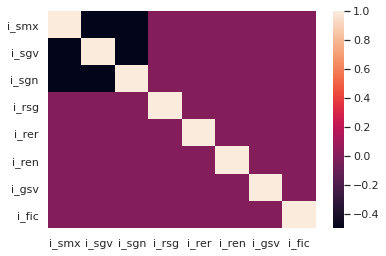

In [167]:
sns.heatmap(data[FEATS].corr(),annot=False)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


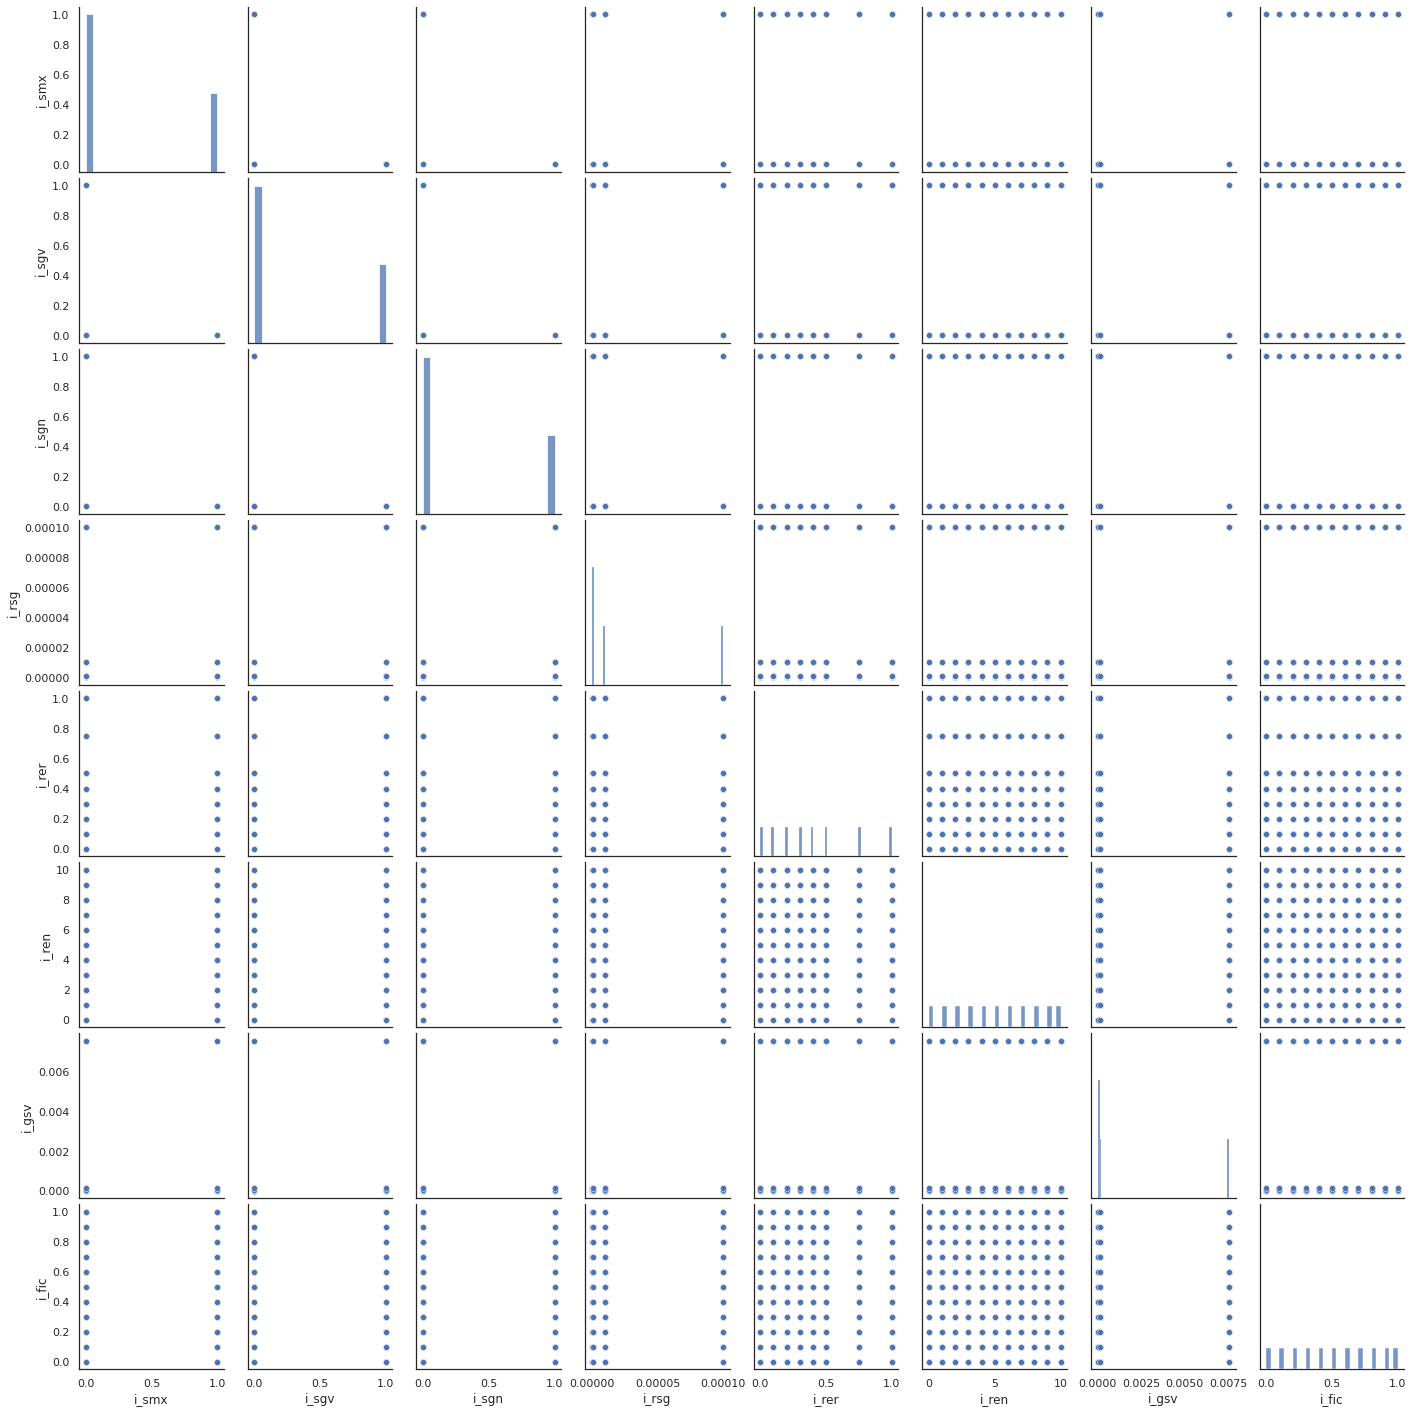

In [171]:
sns.pairplot(data[FEATS],palette='dark')

In [174]:
ohe = OneHotEncoder()
ohe_vector = ohe.fit_transform(data[LABELS]).toarray()

X_train, X_test, y_train, y_test = train_test_split(data[FEATS], ohe_vector)
#X_train, X_test, y_train, y_test = train_test_split(data[FEATS], data[LABELS])

In [177]:
#######################################
########### NEURAL NETWORK ############
#######################################

clf = MLPClassifier(activation='logistic',solver='lbfgs',max_iter=10000)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print('*'*10,'\nNEURAL NETWORK SCORES\n','*'*10)
ac = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test,average='micro')
rec = recall_score(y_pred,y_test,average='micro')
prec = precision_score(y_pred,y_test,average='micro')

print(f'ACCURACY  : {ac}\nF1 SCORE  : {f1}\nRECALL    : {rec}\nPRECISION : {prec}\n')

KeyboardInterrupt: 

In [176]:
#########################################
########## KNN CLASSIFIER ###############
#########################################

clf = KNeighborsClassifier(n_neighbors=8, algorithm='ball_tree')
m_clf = MultiOutputClassifier(clf,n_jobs=-1).fit(X_train, y_train)

y_pred = m_clf.predict(X_test)
print('*'*10,'\nKNN  SCORES\n','*'*10)
ac = accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test,average='micro')
rec = recall_score(y_pred,y_test,average='micro')
prec = precision_score(y_pred,y_test,average='micro')

print(f'ACCURACY  : {ac}\nF1 SCORE  : {f1}\nRECALL    : {rec}\nPRECISION : {prec}\n')

********** 
KNN  SCORES
 **********
ACCURACY  : 0.5294421487603306
F1 SCORE  : 0.816952347973298
RECALL    : 0.8535193150299474
PRECISION : 0.7833899055489965



In [156]:
from joblib import 

